In [1]:
regression = 0
i_m_g = 1
channels = 1
cycle = 0
fft_ = 1
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import matplotlib.pyplot as plt
import torch
# Neural networks can be constructed using the torch.nn package.
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.sampler import SequentialSampler, SubsetRandomSampler
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim
import pickle 

for dirname, _, filenames in os.walk('/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import gc

import warnings 
warnings.filterwarnings('ignore')
from IPython.display import display, clear_output, FileLinks


/kaggle/lib/kaggle/gcp.py
/kaggle/input/flicker-dataset/bb_qp38_qp26_5.yuv
/kaggle/input/flicker-dataset/bb.yuv
/kaggle/input/flicker-dataset/mr_qp44_qp26_3.yuv
/kaggle/input/flicker-dataset/bb_qp38_qp26_2.yuv
/kaggle/input/flicker-dataset/mr_qp38_qp26_5.yuv
/kaggle/input/flicker-dataset/bb_qp44_qp26_3.yuv
/kaggle/input/flicker-dataset/mr_qp32_qp26_3.yuv
/kaggle/input/flicker-dataset/bb_qp26.yuv
/kaggle/input/flicker-dataset/tr_qp38_qp26_3.yuv
/kaggle/input/flicker-dataset/tr_qp44_qp26_3.yuv
/kaggle/input/flicker-dataset/tr.yuv
/kaggle/input/flicker-dataset/tr_qp38_qp26_5.yuv
/kaggle/input/flicker-dataset/mr_qp38_qp26_2.yuv
/kaggle/input/flicker-dataset/tr_qp38_qp26_2.yuv
/kaggle/input/flicker-dataset/bb_qp32_qp26_3.yuv
/kaggle/input/flicker-dataset/phase1.mat
/kaggle/input/flicker-dataset/mr_qp38_qp26_3.yuv
/kaggle/working/__notebook_source__.ipynb


In [2]:
# with open('/kaggle/input/geekyfile/geekyfile (1)', 'rb') as f:
#     prediction_dataset = pickle.load(f)
# prediction_dataset[1]['target'].apply(lambda x : x.data.cpu().numpy())


In [3]:
# a = np.array([1, 2, 3])
# from tempfile import TemporaryFile
# outfile = TemporaryFile()
# np.save("outfile", a)

In [4]:
# vid_tr = '/kaggle/input/flicker-dataset/tr.yuv'
vid = '/kaggle/input/flicker-dataset/tr_qp44_qp26_3.yuv'

%mkdir Y_train
%mkdir Y_test
%mkdir Y
!ls

Y  Y_test  Y_train  __notebook_source__.ipynb


In [5]:
import scipy.io
mat = scipy.io.loadmat('/kaggle/input/flicker-dataset/phase1.mat')

speed_per_frame = mat['phase1_object_speed'][:, -1] * 10
flicker_visibility = mat['phase1_task1_flicker_visibility'][:, 34] * 10

In [6]:
# for i,x in enumerate(mat['phase1_video_list'][0]):
#     print(i, x)

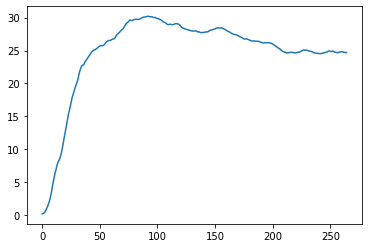

In [7]:
# plt.plot(mat['phase1_task1_flicker_visibility'][:, 7])
plt.plot(mat['phase1_task1_flicker_visibility'][:, 34])

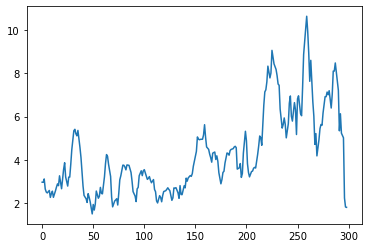

In [8]:
# plt.plot(mat['phase1_object_speed'][:, 1])
plt.plot(mat['phase1_object_speed'][:, -1])

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
#os.listdir('/kaggle/input/flicker-dataset')

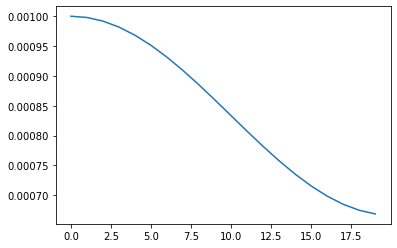

In [11]:
lx = []
lr = 0.001
r = 20
f = 1/5
x = lr/(f+1)
for epoch in tqdm_notebook(range(r)):
    lx.append(lr/(f+1) + lr/(f+1)*f*np.cos(epoch/r*np.pi))
plt.plot(lx)


In [12]:

# vid_paths = os.listdir('/kaggle/input/flicker-dataset')
# vid_paths.remove('tr.yuv')
# vid_paths.remove('phase1.mat')
# # vid_paths.remove('tr_qp26.yuv')
# vid_paths.remove('bb_qp26.yuv')
# vid_paths.remove('bb.yuv')
# # vid_paths.remove('tr_qp32_qp26_3.yuv')
# vid_paths

In [13]:

vid_paths = os.listdir('/kaggle/input/flicker-dataset/')
vid_paths.remove('tr.yuv')
vid_paths.remove('phase1.mat')
# vid_paths.remove('tr_qp26.yuv')
vid_paths.remove('bb_qp26.yuv')
vid_paths.remove('bb.yuv')
# vid_paths.remove('tr_qp32_qp26_3.yuv')
vid_paths


['bb_qp38_qp26_5.yuv',
 'mr_qp44_qp26_3.yuv',
 'bb_qp38_qp26_2.yuv',
 'mr_qp38_qp26_5.yuv',
 'bb_qp44_qp26_3.yuv',
 'mr_qp32_qp26_3.yuv',
 'tr_qp38_qp26_3.yuv',
 'tr_qp44_qp26_3.yuv',
 'tr_qp38_qp26_5.yuv',
 'mr_qp38_qp26_2.yuv',
 'tr_qp38_qp26_2.yuv',
 'bb_qp32_qp26_3.yuv',
 'mr_qp38_qp26_3.yuv']

In [14]:
vid_paths = [
 'tr_qp38_qp26_3.yuv',
 'tr_qp44_qp26_3.yuv',
 'tr_qp38_qp26_5.yuv',
 'tr_qp38_qp26_2.yuv',

 'mr_qp44_qp26_3.yuv',
 'mr_qp38_qp26_5.yuv',
 'mr_qp32_qp26_3.yuv',
 'mr_qp38_qp26_3.yuv',
             
            ]

vid_paths

['tr_qp38_qp26_3.yuv',
 'tr_qp44_qp26_3.yuv',
 'tr_qp38_qp26_5.yuv',
 'tr_qp38_qp26_2.yuv',
 'mr_qp44_qp26_3.yuv',
 'mr_qp38_qp26_5.yuv',
 'mr_qp32_qp26_3.yuv',
 'mr_qp38_qp26_3.yuv']

In [15]:
vid_paths = ['tr_qp38_qp26_3.yuv',
 'tr_qp44_qp26_3.yuv',
 'tr_qp38_qp26_5.yuv',
 'tr_qp38_qp26_2.yuv',
            ]

vid_paths

['tr_qp38_qp26_3.yuv',
 'tr_qp44_qp26_3.yuv',
 'tr_qp38_qp26_5.yuv',
 'tr_qp38_qp26_2.yuv']

In [16]:
# vid_paths = ['bb_qp38_qp26_5.yuv',
#  'mr_qp44_qp26_3.yuv',
#  'tr_qp38_qp26_3.yuv',
#             ]

# vid_paths

In [17]:
def fft(img):
    if len(img.shape) == 3:
        img = img[:, :, 0]
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))

#     plt.figure(figsize=(5,5))
#     plt.subplot(121),plt.imshow(img, cmap = 'gray')
#     plt.title('Input Image'), plt.xticks([]), plt.yticks([])
#     plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
#     plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
#     plt.show()
    return magnitude_spectrum


In [18]:
def enc_(flicker_visibility, flick_flag):
    if flicker_visibility[flick_flag] /10  < 0.5:
        enc = 0
    elif flicker_visibility[flick_flag] /10  < 1:
        enc = 1
    elif flicker_visibility[flick_flag] /10  < 1.5:
        enc = 2
    elif flicker_visibility[flick_flag] /10  < 2:
        enc = 3
    elif flicker_visibility[flick_flag] /10  < 2.5:
        enc = 4
    elif flicker_visibility[flick_flag] /10  < 3:
        enc = 5
    elif flicker_visibility[flick_flag] /10  < 3.5:
        enc = 6
    elif flicker_visibility[flick_flag] /10  < 4:
        enc = 7
    elif flicker_visibility[flick_flag] /10  < 4.5:
        enc = 8
    elif flicker_visibility[flick_flag] /10  < 5:
        enc = 9
    elif flicker_visibility[flick_flag] /10  < 5.5:
        enc = 10
    elif flicker_visibility[flick_flag] /10  < 6:
        enc = 11
    elif flicker_visibility[flick_flag] /10  < 6.5:
        enc = 12
    elif flicker_visibility[flick_flag] /10  < 7:
        enc = 13
    elif flicker_visibility[flick_flag] /10  < 7.5:
        enc = 14
    elif flicker_visibility[flick_flag] /10  < 8:
        enc = 15
    elif flicker_visibility[flick_flag] /10  < 8.5:
        enc = 16
    elif flicker_visibility[flick_flag] /10  < 9:
        enc = 17
    elif flicker_visibility[flick_flag] /10  < 9.5:
        enc = 18
    else :
        enc = 19
    return enc

In [19]:
# def enc_(flicker_visibility, flick_flag):
#     if flicker_visibility[flick_flag] /10  < 1:
#         enc = 0
#     elif flicker_visibility[flick_flag] /10  <2:
#         enc = 1
#     elif flicker_visibility[flick_flag] /10  < 3:
#         enc = 2
#     elif flicker_visibility[flick_flag] /10  < 4:
#         enc = 3
#     elif flicker_visibility[flick_flag] /10  < 5:
#         enc = 4
#     elif flicker_visibility[flick_flag] /10  < 6:
#         enc = 5
#     elif flicker_visibility[flick_flag] /10  < 7:
#         enc = 6
#     elif flicker_visibility[flick_flag] /10  < 8:
#         enc = 7
#     elif flicker_visibility[flick_flag] /10  < 9:
#         enc = 8
#     else :
#         enc = 9
#     return enc

In [20]:
%%time
folder_path = '/kaggle/input/flicker-dataset'
phase1_video_list = pd.Series(mat['phase1_video_list'][0])
train_names  = []
train_names_fft  = []
train_speeds = []
train_labels = []
train_encoded_labels = []


test_names  = []
test_names_fft  = []
test_speeds = []
test_labels = []
test_encoded_labels = []

speed_dict = {
    'bb_' : 0,
    'bmx' : 1,
    'la_' : 2,
    'mr_' : 3,
    'rc_' : 4,
    'tr_' : 5,
             } 

w, h = 1280, 720
for vid in tqdm_notebook(vid_paths):
    vid_path = os.path.join(folder_path, vid)
    fid = open(vid_path,'rb');
    dim = np.fromfile(fid, dtype=np.uint8) # read in entire dataset
    img_1=np.random.uniform(size=(h, w))*255
    img_2=np.random.uniform(size=(h, w))*255
    vid = vid[:-4]
    
    idx = phase1_video_list[phase1_video_list == vid].index.values[0]
    flicker_visibility = mat['phase1_task1_flicker_visibility'][:, idx]
    speed_per_frame = mat['phase1_object_speed'][:, speed_dict[vid[:3]]]
    
    index = 0
    endindex = w*h
    nextindex = int(w*h*3/2)
    train_count=1


CPU times: user 95.5 ms, sys: 907 ms, total: 1 s
Wall time: 4.09 s


In [ ]:
%%time
folder_path = '/kaggle/input/flicker-dataset'
phase1_video_list = pd.Series(mat['phase1_video_list'][0])
train_names  = []
train_names_fft  = []
train_speeds = []
train_labels = []
train_encoded_labels = []


test_names  = []
test_names_fft  = []
test_speeds = []
test_labels = []
test_encoded_labels = []

speed_dict = {
    'bb_' : 0,
    'bmx' : 1,
    'la_' : 2,
    'mr_' : 3,
    'rc_' : 4,
    'tr_' : 5,
             } 

w, h = 1280, 720
for vid in tqdm_notebook(vid_paths):
    vid_path = os.path.join(folder_path, vid)
    fid = open(vid_path,'rb');
    dim = np.fromfile(fid, dtype=np.uint8) # read in entire dataset
    img_1=np.random.uniform(size=(h, w))*255
    img_2=np.random.uniform(size=(h, w))*255
    vid = vid[:-4]
    
    idx = phase1_video_list[phase1_video_list == vid].index.values[0]
    flicker_visibility = mat['phase1_task1_flicker_visibility'][:, idx]
    speed_per_frame = mat['phase1_object_speed'][:, speed_dict[vid[:3]]]
    
    index = 0
    endindex = w*h
    nextindex = int(w*h*3/2)
    train_count=1
    for flag in tqdm_notebook(range(int(len(dim) // (h*2*w)))):
        x=1
        newdim = dim[index:endindex]
        newdim = newdim.reshape(x, h, w)    

        index = nextindex
        endindex = index + w*h
        nextindex = index + int(w*h*3/2)
        img = newdim[0]

        
        
        fft_img = fft(img)
        fft_img_1 = fft(img_1)
        fft_img_2 = fft(img_2)
        
        if i_m_g:
            if channels:
                new_img_fft = np.array([fft_img, fft_img_1, fft_img_2]).transpose(1,2,0)
#                 new_img_fft = np.array([fft_img, fft_img, fft_img]).transpose(1,2,0)
                new_img_fft = Image.fromarray(np.uint8(new_img_fft), 'RGB')
                new_img = np.array([img, img_1, img_2]).transpose(1,2,0)
                new_img = Image.fromarray(np.uint8(new_img), 'RGB')
                
                
            else:
                new_img_fft = np.array(fft_img)#, fft_img_1, fft_img_2])
                new_img_fft = Image.fromarray(np.uint8(new_img_fft), 'L')
                
                new_img = np.array(img)#, fft_img_1, fft_img_2])
                new_img = Image.fromarray(np.uint8(new_img), 'L')
        
        else:
            new_img_fft = np.array(fft_img)#fft_img_1, fft_img_2])
            new_img_fft = new_img.transpose(1,2,0)
            
            new_img = np.array(img)#fft_img_1, fft_img_2])
            new_img = new_img.transpose(1,2,0)

        img_2 = img_1.copy()
        img_1 = img.copy()
        img = new_img.copy()
        img_fft = new_img_fft.copy()

        if flag <= 2 :
            continue
            
            
        flick_flag = flag
        if train_count <= 4:
            train_count+=1

            name = "Y/" +vid+ "y" + str(flag)
            if i_m_g:
                img_fft.save(name + 'fft.png')
                name_fft = name.split('/')[-1] + 'fft.png'
                
                img.save(name + '.png')
                name = name.split('/')[-1] + '.png'
            else:
                np.save(name + 'fft', img)
                name_fft = name.split('/')[-1] + 'fft.npy'
                
                np.save(name, img)
                name = name.split('/')[-1] + '.npy'
#             plt.imshow(img)
#             plt.show()

            train_names.append(name)
            train_names_fft.append(name_fft)
            train_speeds.append([speed_per_frame[flag-0], speed_per_frame[flag-1], speed_per_frame[flag-2]])
#             train_speeds.append([speed_per_frame[flag-0], speed_per_frame[flag], speed_per_frame[flag]])
            train_labels.append(flicker_visibility[flick_flag] )
            enc = enc_(flicker_visibility, flick_flag)
            train_encoded_labels.append(enc)
        else:
            train_count=1

            name = "Y/" +vid+ "y" + str(flag)
            if i_m_g:
                img_fft.save(name + 'fft.png')
                name_fft = name.split('/')[-1] + 'fft.png'
                
                img.save(name + '.png')
                name = name.split('/')[-1] + '.png'
            else:
                np.save(name + 'fft', img)
                name_fft = name.split('/')[-1] + 'fft.npy'
                
                np.save(name, img)
                name = name.split('/')[-1] + '.npy'
#             plt.imshow(img)
#             plt.show()

            test_names.append(name)
            test_names_fft.append(name_fft)
            test_speeds.append([speed_per_frame[flag-0], speed_per_frame[flag-1], speed_per_frame[flag-2]])
#             test_speeds.append([speed_per_frame[flag-0], speed_per_frame[flag], speed_per_frame[flag]])
            test_labels.append(flicker_visibility[flick_flag] )
            enc = enc_(flicker_visibility, flick_flag)
            test_encoded_labels.append(enc)

#         if flag==4:
#             break


In [ ]:
train_labels[:5]

In [ ]:
data = {'Images':train_names, 'Images_fft':train_names_fft, 'labels':train_labels, 'speed' : train_speeds, 'encoded_labels' : train_encoded_labels} 
data = pd.DataFrame(data)
data['labels'] = data['labels'].astype(str)
data['nu_labels'] = data['labels'].astype(float)
data.head()


train_data = data.copy()

data = {'Images':test_names, 'Images_fft':test_names_fft, 'labels':test_labels, 'speed' : test_speeds, 'encoded_labels' : test_encoded_labels} 
data = pd.DataFrame(data)
data['labels'] = data['labels'].astype(str)
data['nu_labels'] = data['labels'].astype(float)
data.head()


test_data = data.copy()




In [ ]:
batch_size = 32
validation_split = .25
shuffle_dataset = False
random_seed= 42

In [ ]:
data = pd.concat([train_data, test_data], axis=0)
data = data.reset_index(drop=True)
train_indices, val_indices = list(data.iloc[:len(train_data), :].index), list(data.iloc[len(train_data):, :].index)
data.head()

In [ ]:
# dataset_size = len(data)
# indices = list(range(dataset_size))
# split = int(np.floor(validation_split * dataset_size))
# if shuffle_dataset :
#     np.random.seed(random_seed)
#     np.random.shuffle(indices)
# train_indices, val_indices = indices[split:], indices[:split]

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
#      transforms.Resize(325),
     transforms.Normalize((0.5), (0.5))])

if i_m_g:
    transform = transforms.Compose(
        [transforms.ToTensor(),
#          transforms.Resize(320),
         transforms.Normalize((0.5), (0.5))])

In [ ]:
class Arthopod_Dataset(Dataset):
    def __init__(self, img_data,img_path,transform=None):
        self.img_path = img_path
        self.transform = transform
        self.img_data = img_data
        
    def __len__(self):
        return len(self.img_data)
    
    def __getitem__(self, index):
        img_name = os.path.join(self.img_path,
                                self.img_data.loc[index, 'Images'])
        img_name_fft = os.path.join(self.img_path,
                                self.img_data.loc[index, 'Images_fft'])
        
        
        if i_m_g : 
            image = Image.open(img_name)
            image = image.resize((224,224))
            
            
            image_fft = Image.open(img_name_fft)
            image_fft = image_fft.resize((224,224))
            
        else:
            image = np.load(img_name)
            image = image.reshape( -1, 320, 9)
            
            image_fft = np.load(img_name_fft)
            image_fft = image_fft.reshape( -1, 320, 9)
            
            
            
            
            
#             image =  torch.from_numpy(image)

        if regression:
            label = torch.tensor(self.img_data.loc[index, 'encoded_labels']) # regression
        else:
            label = torch.tensor(self.img_data.loc[index, 'encoded_labels']) # classification
        speed = torch.tensor(self.img_data.loc[index, 'speed']) / 10

        if self.transform is not None:
            image = self.transform(image)
            image_fft = self.transform(image_fft)
        image.float()
        image_fft.float()
        
        if regression:
            label.float() # regression
        if i_m_g:
            return image, image_fft, label, speed, index
        else:
            return image[:6, :, :], image_fft[:6, :, :], label, speed, index

    

In [ ]:
BASE_PATH = '/kaggle/working/Y/'
dataset = Arthopod_Dataset(data,BASE_PATH,transform)
# dataset. __getitem__(5)

In [ ]:
def npy_loader(path):
    sample = torch.from_numpy(np.load(path))
    return sample

In [ ]:
# Creating PT data samplers and loaders:

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)


# train_sampler = SequentialSampler(train_indices)
# valid_sampler = SequentialSampler(val_indices)



train_sampler

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)



# train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
#                                            shuffle=False)
# validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
#                                                 shuffle=False)




In [ ]:
for i in range(1):
    for data_t, data_t_fft, target_t, speeds_t, index_t in (validation_loader):
#         print(target_t.data.cpu().numpy())
        print(i, len(index_t.data.cpu().numpy() - len(train_indices)))

In [ ]:
def img_display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if i_m_g:
#         npimg = np.transpose(npimg, (2, 0, 1)) # code 3
        return npimg
#     return npimg[0, :, :]
    return npimg

In [ ]:
# os.listdir('Y/')

In [ ]:
dataiter = iter(train_loader)
images, images_fft, labels, speeds, indexes = dataiter.next()
np.transpose(images[0], (2, 0, 1)).shape
np.transpose(images[0], (0, 1, 2)).shape

In [ ]:
def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

In [ ]:
images[0].shape

In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, images_fft, labels, speeds, indexes = dataiter.next()
arthopod_types = {0: 'Coleoptera', 1: 'Diptera', 2: 'Hymenoptera', 3: 'Lepidoptera'}
# Viewing data examples used for training
fig, axis = plt.subplots(2, 2, figsize=(15, 10))
for i, ax in enumerate(axis.flat):
    with torch.no_grad():
        image, label, speed = images[i], labels[i], speeds[i] 
        image = image[0] # code 1
        ax.imshow(img_display(image)) # add image
#         ax.set(title = f"{[label.item(), speed.item()]}") # add label
        ax.set(title = f"{[label.item()]}") # add label

In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, images_fft, labels, speeds, indexes = dataiter.next()
arthopod_types = {0: 'Coleoptera', 1: 'Diptera', 2: 'Hymenoptera', 3: 'Lepidoptera'}
# Viewing data examples used for training
fig, axis = plt.subplots(2, 2, figsize=(15, 10))
for i, ax in enumerate(axis.flat):
    with torch.no_grad():
        image, label, speed = images_fft[i], labels[i], speeds[i] 
        image = image[0] # code 1
        ax.imshow(img_display(image)) # add image
#         ax.set(title = f"{[label.item(), speed.item()]}") # add label
        ax.set(title = f"{[label.item()]}") # add label

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 3 input image channel, 16 output channels, 3x3 square convolution kernel
#         self.conv1 = nn.Conv2d(1,16,kernel_size=3,stride=2,padding=1) # code 1
        self.conv1 = nn.Conv2d(9,16,kernel_size=3,stride=2,padding=1) # code 3
        self.conv2 = nn.Conv2d(16, 32,kernel_size=3,stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 64,kernel_size=3,stride=2, padding=1)
        self.conv4 = nn.Conv2d(64, 64,kernel_size=3,stride=2, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout2d(0.4)
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64*5*5,64 )
#         self.fc2 = nn.Linear(512, 256) # regssion
#         self.fc3 = nn.Linear(256, 4) # regssion
#         self.fc2 = nn.Linear(512, 64)#classification
#         self.fc3 = nn.Linear(256, 10)#classification
        
        self.linear = nn.Linear(4, 1)
        self.linear_s = nn.Linear(1, 1)
        self.linear_s1 = nn.Linear(65, 10)
        
        
        
        
        
    def forward(self, img, speed):
        img.float()
        speed.float()
        img = self.batchnorm1(F.relu(self.conv1(img)))
        img = self.batchnorm2(F.relu(self.conv2(img)))
        img = self.dropout(self.batchnorm2(self.pool(img)))
        img = self.batchnorm3(self.pool(F.relu(self.conv3(img))))
        img = self.dropout(self.conv4(img))
        img = img.view(-1, 64*5*5) # Flatten layer
#         img = self.dropout(self.fc1(img))
        img = self.fc1(img)
#         img = self.dropout(self.fc2(img)) # regression 
#         img = self.fc2(img)# classification

#         img = self.linear(self.fc3(img)) # regression 
#         img = self.fc3(img) # classification
        
    
#         img   = self.fc3(img)
        speed = speed.view(speed.size(0), -1)
        speed = self.linear_s(speed)
        speed = speed.view(speed.size(0), -1)
        img   = img.view(speed.size(0), -1)
        x = torch.cat([img, speed], dim=1)
        x = self.linear_s1(x)
        
        
        return x #img
    


In [ ]:
def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

In [ ]:
if ~i_m_g:
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()

            vgg16 = models.vgg16(pretrained=True)
    #         vgg16.load_state_dict(torch.load("../input/vgg16bn/vgg16_bn.pth"))
            print(vgg16.classifier[6].out_features) # 1000 


            # Freeze training for all layers
            for param in vgg16.features.parameters():
                param.require_grad = False

            # Newly created modules have require_grad=True by default
            num_features = vgg16.classifier[6].in_features
            features = list(vgg16.classifier.children())[:-1] # Remove last layer
            features.extend([nn.Linear(num_features, 10)]) # Add our layer with 4 outputs
            vgg16.classifier = nn.Sequential(*features) # Replace the model classifier
            self.model_ft1 = vgg16
            self.model_ft2 = vgg16
    #         self.model_ft3 = vgg16



            self.linear = nn.Linear(4, 1)
            self.linear_s = nn.Linear(1, 1)
            self.linear_s1 = nn.Linear(23, 1)





        def forward(self, img, speed):
            img.float()
            speed.float()


            img1 = self.model_ft1(img[ :, :3, :, :])
            img2 = self.model_ft2(img[ :, 3:6, :, :])
    #         img3 = self.model_ft3(img[ :, 6:9, :, :])


            speed = speed.view(speed.size(0), -1)
    #         speed = self.linear_s(speed)
            speed = speed.view(speed.size(0), -1)
            img1   = img1.view(speed.size(0), -1)
            img2   = img2.view(speed.size(0), -1)
    #         img3   = img3.view(speed.size(0), -1)
    #         x = torch.cat([img1, img2, img3, speed], dim=1)
            x = torch.cat([img1, img2, speed], dim=1)
            x = self.linear_s1(x)


            return x
    
if i_m_g:
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()

            vgg16 = models.vgg16(pretrained=True)
    #         vgg16.load_state_dict(torch.load("../input/vgg16bn/vgg16_bn.pth"))
            print(vgg16.classifier[6].out_features) # 1000 


            # Freeze training for all layers
            for param in vgg16.features.parameters():
                param.require_grad = False

            # Newly created modules have require_grad=True by default
            num_features = vgg16.classifier[6].in_features
            features = list(vgg16.classifier.children())[:-1] # Remove last layer
            features.extend([nn.Linear(num_features, 20)]) # Add our layer with 4 outputs
            vgg16.classifier = nn.Sequential(*features) # Replace the model classifier
            
            self.model_ft1 = vgg16

            vgg16_1 = models.vgg16(pretrained=True)
    #         vgg16.load_state_dict(torch.load("../input/vgg16bn/vgg16_bn.pth"))
            print(vgg16_1.classifier[6].out_features) # 1000 

            for param in vgg16_1.features.parameters():
                param.require_grad = False

            # Newly created modules have require_grad=True by default
            num_features = vgg16_1.classifier[6].in_features
            features = list(vgg16_1.classifier.children())[:-1] # Remove last layer
            features.extend([nn.Linear(num_features, 1)]) # Add our layer with 4 outputs
            vgg16_1.classifier = nn.Sequential(*features) # Replace the model classifier
            self.model_ft2 = vgg16_1
            
            
            vgg16 = models.vgg16(pretrained=True)
    #         vgg16.load_state_dict(torch.load("../input/vgg16bn/vgg16_bn.pth"))
            print(vgg16.classifier[6].out_features) # 1000 


            # Freeze training for all layers
            for param in vgg16.features.parameters():
                param.require_grad = False

            # Newly created modules have require_grad=True by default
            num_features = vgg16.classifier[6].in_features
            features = list(vgg16.classifier.children())[:-1] # Remove last layer
            features.extend([nn.Linear(num_features, 1)]) # Add our layer with 4 outputs
            vgg16.classifier = nn.Sequential(*features) # Replace the model classifier
            
            self.model_ft3 = vgg16
            
            
            
    #         self.model_ft = models.inception_v3(pretrained=True)
    #         for param in self.model_ft.parameters():
    #             param.requires_grad = False

    #         # Parameters of newly constructed modules have requires_grad=True by default
    #         # Handle the auxilary net
    #         self.num_ftrs = self.model_ft.AuxLogits.fc.in_features
    #         self.model_ft.AuxLogits.fc = nn.Linear(self.num_ftrs, 2)
    #         # Handle the primary net
    #         num_ftrs = self.model_ft.fc.in_features
    #         self.model_ft.fc = nn.Linear(self.num_ftrs, 4)

    
    

            self.linear = nn.Linear(4, 1)
            self.linear_s = nn.Linear(1, 1)
            if regression : 
                self.linear_s1 = nn.Linear(25, 1)
            else:
                self.linear_s1 = nn.Linear(25, 20)





        def forward(self, img_original, img_original_fft, speed):
            img_original.float()
            speed.float()

            speed = speed.view(speed.size(0), -1)
        
            model1_outs_10 = self.model_ft1(img_original)
            model1_outs_10   = model1_outs_10.view(speed.size(0), -1)
            
            model2_outs_10 = self.model_ft2(img_original)
            model2_outs_10   = model2_outs_10.view(speed.size(0), -1)
            
            model3_outs_1 = self.model_ft3(img_original_fft)
            model3_outs_1   = model3_outs_1.view(speed.size(0), -1)
            
            
            x = torch.cat([model1_outs_10, speed], dim=1)
            x = x.view(speed.size(0), -1)
            x = torch.cat([x, model2_outs_10], dim=1)
            x = x.view(speed.size(0), -1)
            x = torch.cat([x, model3_outs_1], dim=1)
            x = self.linear_s1(x)


            return x


# print(model)

In [ ]:
# for epoch in tqdm_notebook(range(1, 20+1)):
#     print(0.0001 + 1/((100+epoch**2)*10))

In [ ]:
#  + 1/((100+epoch**2)*10)

In [ ]:
target_t

In [ ]:
n_epochs = 20
model = Net().to(device)  # On GPU
if regression:
    criterion = nn.MSELoss()# regression
else :
    criterion = nn.CrossEntropyLoss()# classification


print_every = 1
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
prediction_dataset = {}

val_target = []
val_pred = []


total_step = len(train_loader)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1) 
fig.suptitle("Train - Validation Loss")
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(loc=2, prop={'size': 60})
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='green', label='train')
green_patch = mpatches.Patch(color='red', label='val')
plt.legend(handles=[red_patch, green_patch])
ax.set_xlim(0, n_epochs+1)

lr = 0.001
f = 2/5
r =  n_epochs

loss_reg = [0]*5
count = 0

for i in range(100):
    if np.std(loss_reg) <= np.mean(loss_reg) / 2:
        loss_reg.append(i)
        loss_reg = loss_reg[1:]
        print(loss_reg)

data_stack = pd.DataFrame(index = range(len(val_indices) + 1))
data_stack['target'] = 0
fff = 0


for epoch in tqdm_notebook(range(1, n_epochs+1)):
    if fff:
        break
    try:
        print('lr : ', lr)
        print(loss_reg)
        print(prediction_dataset[epoch-1])
    except:
        print("")
    gc.collect()
    if cycle : 
        LR = lr/(f+1) + lr/(f+1)*f*np.cos(epoch/r*np.pi)
    else:
        LR = lr
#     optimizer = optim.Adam(model.parameters(), lr=LR, )
    optimizer = optim.AdamW(model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
#     optimizer = optim.AdamW(model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08,amsgrad=False)
    running_loss = 0.0
    # scheduler.step(epoch)
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_,  data_fft_, target_, speeds_, index_) in tqdm_notebook(enumerate(train_loader)):
        data_ = data_.float()
        data_fft_ = data_fft_.float()
        if regression:
            target_ = target_.float() # regression
        speeds_ = speeds_.float()
        data_, data_fft_, target_ , speeds_ = data_.to(device),  data_fft_.to(device), target_.to(device), speeds_.to(device) # on GPU
        
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        
        outputs = model(data_, data_fft_, speeds_)
#         print(outputs.shape)
        
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % print_every == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain loss: {np.mean(train_loss):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        model.eval()
        for data_t, data_t_fft, target_t, speeds_t, index_t in (validation_loader):
            data_t.float()
            data_t_fft.float()
            if regression:
                target_t = target_t.float() # regression
            speeds_t = speeds_t.float()
            data_t, data_t_fft, target_t, speeds_t = data_t.to(device), data_t_fft.to(device), target_t.to(device), speeds_t.to(device) # on GPU
            outputs_t = model(data_t, data_t_fft, speeds_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
            data_stack[epoch] = 0
            for i,j in zip(np.array(target_t.data.cpu().numpy()), data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), 'target']):
                if i!=j and epoch >= 2:
                    print("error")
                    fff = 1
            
            
            data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), 'target'] = np.array(target_t.data.cpu().numpy())
            if regression:
                data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), epoch] = np.array(outputs_t.data.cpu().numpy())
            else:
                data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), epoch] = np.array(outputs_t.argmax(axis = 1).data.cpu().numpy())
            
            for tar in target_t:
                val_target.append(tar*10)
            if regression:
                predd = outputs_t
            else:
                predd = outputs_t.argmax(axis = 1)
            for pre in predd:
                val_pred.append(pre*10)
            
        prediction_dataset[epoch] = pd.DataFrame({"target" : val_target, "preds" : val_pred})
        
        val_target = []
        val_pred = []
        
        val_acc.append(100 * correct_t / total_t)
        val_loss.append(batch_loss/len(validation_loader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}\n')
        # Saving the best weight 
        if network_learned:
            valid_loss_min = batch_loss
            torch.save(model.state_dict(), 'model_classification_tutorial.pt')
            print('Detected network improvement, saving current model')
    model.train()



    ax.plot( train_loss, label='train', color='green')
    ax.plot( val_loss, label='val', color='red')
    clear_output(wait = True)
    display(fig)
    
    last_reg = np.mean(loss_reg)
    loss_reg.append(val_loss[-1])
    loss_reg = loss_reg[1:]
    count += 1
    
    if (np.std(loss_reg) <= np.mean(loss_reg) / 20 and count >= 5) or (np.mean(loss_reg) > last_reg + last_reg/5 and count >= 5):
        print('reducing lr')
        if lr > 0.0000001 and epoch > 15:
            count = 0
#             lr /= 10
        
    
    
    plt.pause(0.5)




In [ ]:
ep = n_epochs
n_epochs = 20

# model = Net().to(device)  # On GPU
# if regression:
#     criterion = nn.MSELoss()# regression
# else :
#     criterion = nn.CrossEntropyLoss()# classification


print_every = 1
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
# prediction_dataset = {}

val_target = []
val_pred = []


total_step = len(train_loader)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1) 
fig.suptitle("Train - Validation Loss")
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(loc=2, prop={'size': 60})
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='green', label='train')
green_patch = mpatches.Patch(color='red', label='val')
plt.legend(handles=[red_patch, green_patch])
ax.set_xlim(0, n_epochs+1)

lr = 0.001/5
f = 2/5
r =  n_epochs

loss_reg = [0]*5
count = 0

for i in range(100):
    if np.std(loss_reg) <= np.mean(loss_reg) / 2:
        loss_reg.append(i)
        loss_reg = loss_reg[1:]
        print(loss_reg)

# data_stack = pd.DataFrame(index = range(len(val_indices) + 1))
# data_stack['target'] = 0
# fff = 0


for epoch in tqdm_notebook(range(1, n_epochs+1)):
    if fff:
        break
    try:
        print('lr : ', lr)
        print(loss_reg)
        print(prediction_dataset[epoch-1])
    except:
        print("")
    gc.collect()
    if cycle : 
        LR = lr/(f+1) + lr/(f+1)*f*np.cos(epoch/r*np.pi)
    else:
        LR = lr
#     optimizer = optim.Adam(model.parameters(), lr=LR, )
    optimizer = optim.AdamW(model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
#     optimizer = optim.AdamW(model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08,amsgrad=False)
    running_loss = 0.0
    # scheduler.step(epoch)
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_,  data_fft_, target_, speeds_, index_) in tqdm_notebook(enumerate(train_loader)):
        data_ = data_.float()
        data_fft_ = data_fft_.float()
        if regression:
            target_ = target_.float() # regression
        speeds_ = speeds_.float()
        data_, data_fft_, target_ , speeds_ = data_.to(device),  data_fft_.to(device), target_.to(device), speeds_.to(device) # on GPU
        
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        
        outputs = model(data_, data_fft_, speeds_)
#         print(outputs.shape)
        
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % print_every == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain loss: {np.mean(train_loss):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        model.eval()
        for data_t, data_t_fft, target_t, speeds_t, index_t in (validation_loader):
            data_t.float()
            data_t_fft.float()
            if regression:
                target_t = target_t.float() # regression
            speeds_t = speeds_t.float()
            data_t, data_t_fft, target_t, speeds_t = data_t.to(device), data_t_fft.to(device), target_t.to(device), speeds_t.to(device) # on GPU
            outputs_t = model(data_t, data_t_fft, speeds_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
            data_stack[ep+epoch] = 0
            for i,j in zip(np.array(target_t.data.cpu().numpy()), data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), 'target']):
                if i!=j and epoch >= 2:
                    print("error")
                    fff = 1
            
            
            data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), 'target'] = np.array(target_t.data.cpu().numpy())
            if regression:
                data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), ep+epoch] = np.array(outputs_t.data.cpu().numpy())
            else:
                data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), ep+epoch] = np.array(outputs_t.argmax(axis = 1).data.cpu().numpy())
            
            for tar in target_t:
                val_target.append(tar*10)
            if regression:
                predd = outputs_t
            else:
                predd = outputs_t.argmax(axis = 1)
            for pre in predd:
                val_pred.append(pre*10)
            
        prediction_dataset[ep+epoch] = pd.DataFrame({"target" : val_target, "preds" : val_pred})
        
        val_target = []
        val_pred = []
        
        val_acc.append(100 * correct_t / total_t)
        val_loss.append(batch_loss/len(validation_loader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}\n')
        # Saving the best weight 
        if network_learned:
            valid_loss_min = batch_loss
            torch.save(model.state_dict(), 'model_classification_tutorial.pt')
            print('Detected network improvement, saving current model')
    model.train()



    ax.plot( train_loss, label='train', color='green')
    ax.plot( val_loss, label='val', color='red')
    clear_output(wait = True)
    display(fig)
    
    last_reg = np.mean(loss_reg)
    loss_reg.append(val_loss[-1])
    loss_reg = loss_reg[1:]
    count += 1
    
    if (np.std(loss_reg) <= np.mean(loss_reg) / 20 and count >= 5) or (np.mean(loss_reg) > last_reg + last_reg/5 and count >= 5):
        print('reducing lr')
        if lr > 0.0000001 and epoch > 15:
            count = 0
#             lr /= 10
        
    
    
    plt.pause(0.5)




In [ ]:
ep += n_epochs
n_epochs = 20

# model = Net().to(device)  # On GPU
# if regression:
#     criterion = nn.MSELoss()# regression
# else :
#     criterion = nn.CrossEntropyLoss()# classification


print_every = 1
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
# prediction_dataset = {}

val_target = []
val_pred = []


total_step = len(train_loader)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1) 
fig.suptitle("Train - Validation Loss")
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(loc=2, prop={'size': 60})
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='green', label='train')
green_patch = mpatches.Patch(color='red', label='val')
plt.legend(handles=[red_patch, green_patch])
ax.set_xlim(0, n_epochs+1)

lr = 0.001/10
f = 2/5
r =  n_epochs

loss_reg = [0]*5
count = 0

for i in range(100):
    if np.std(loss_reg) <= np.mean(loss_reg) / 2:
        loss_reg.append(i)
        loss_reg = loss_reg[1:]
        print(loss_reg)

# data_stack = pd.DataFrame(index = range(len(val_indices) + 1))
# data_stack['target'] = 0
# fff = 0


for epoch in tqdm_notebook(range(1, n_epochs+1)):
    if fff:
        break
    try:
        print('lr : ', lr)
        print(loss_reg)
        print(prediction_dataset[epoch-1])
    except:
        print("")
    gc.collect()
    if cycle : 
        LR = lr/(f+1) + lr/(f+1)*f*np.cos(epoch/r*np.pi)
    else:
        LR = lr
#     optimizer = optim.Adam(model.parameters(), lr=LR, )
    optimizer = optim.AdamW(model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
#     optimizer = optim.AdamW(model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08,amsgrad=False)
    running_loss = 0.0
    # scheduler.step(epoch)
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_,  data_fft_, target_, speeds_, index_) in tqdm_notebook(enumerate(train_loader)):
        data_ = data_.float()
        data_fft_ = data_fft_.float()
        if regression:
            target_ = target_.float() # regression
        speeds_ = speeds_.float()
        data_, data_fft_, target_ , speeds_ = data_.to(device),  data_fft_.to(device), target_.to(device), speeds_.to(device) # on GPU
        
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        
        outputs = model(data_, data_fft_, speeds_)
#         print(outputs.shape)
        
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % print_every == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain loss: {np.mean(train_loss):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        model.eval()
        for data_t, data_t_fft, target_t, speeds_t, index_t in (validation_loader):
            data_t.float()
            data_t_fft.float()
            if regression:
                target_t = target_t.float() # regression
            speeds_t = speeds_t.float()
            data_t, data_t_fft, target_t, speeds_t = data_t.to(device), data_t_fft.to(device), target_t.to(device), speeds_t.to(device) # on GPU
            outputs_t = model(data_t, data_t_fft, speeds_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
            data_stack[ep+epoch] = 0
            for i,j in zip(np.array(target_t.data.cpu().numpy()), data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), 'target']):
                if i!=j and epoch >= 2:
                    print("error")
                    fff = 1
            
            
            data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), 'target'] = np.array(target_t.data.cpu().numpy())
            if regression:
                data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), ep+epoch] = np.array(outputs_t.data.cpu().numpy())
            else:
                data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), ep+epoch] = np.array(outputs_t.argmax(axis = 1).data.cpu().numpy())
            
            for tar in target_t:
                val_target.append(tar*10)
            if regression:
                predd = outputs_t
            else:
                predd = outputs_t.argmax(axis = 1)
            for pre in predd:
                val_pred.append(pre*10)
            
        prediction_dataset[ep+epoch] = pd.DataFrame({"target" : val_target, "preds" : val_pred})
        
        val_target = []
        val_pred = []
        
        val_acc.append(100 * correct_t / total_t)
        val_loss.append(batch_loss/len(validation_loader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}\n')
        # Saving the best weight 
        if network_learned:
            valid_loss_min = batch_loss
            torch.save(model.state_dict(), 'model_classification_tutorial.pt')
            print('Detected network improvement, saving current model')
    model.train()



    ax.plot( train_loss, label='train', color='green')
    ax.plot( val_loss, label='val', color='red')
    clear_output(wait = True)
    display(fig)
    
    last_reg = np.mean(loss_reg)
    loss_reg.append(val_loss[-1])
    loss_reg = loss_reg[1:]
    count += 1
    
    if (np.std(loss_reg) <= np.mean(loss_reg) / 20 and count >= 5) or (np.mean(loss_reg) > last_reg + last_reg/5 and count >= 5):
        print('reducing lr')
        if lr > 0.0000001 and epoch > 15:
            count = 0
#             lr /= 10
        
    
    
    plt.pause(0.5)




In [ ]:
ep += n_epochs
n_epochs = 20

# model = Net().to(device)  # On GPU
# if regression:
#     criterion = nn.MSELoss()# regression
# else :
#     criterion = nn.CrossEntropyLoss()# classification


print_every = 1
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
# prediction_dataset = {}

val_target = []
val_pred = []


total_step = len(train_loader)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1) 
fig.suptitle("Train - Validation Loss")
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(loc=2, prop={'size': 60})
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='green', label='train')
green_patch = mpatches.Patch(color='red', label='val')
plt.legend(handles=[red_patch, green_patch])
ax.set_xlim(0, n_epochs+1)

lr = 0.001/50
f = 2/5
r =  n_epochs

loss_reg = [0]*5
count = 0

for i in range(100):
    if np.std(loss_reg) <= np.mean(loss_reg) / 2:
        loss_reg.append(i)
        loss_reg = loss_reg[1:]
        print(loss_reg)

# data_stack = pd.DataFrame(index = range(len(val_indices) + 1))
# data_stack['target'] = 0
# fff = 0


for epoch in tqdm_notebook(range(1, n_epochs+1)):
    if fff:
        break
    try:
        print('lr : ', lr)
        print(loss_reg)
        print(prediction_dataset[epoch-1])
    except:
        print("")
    gc.collect()
    if cycle : 
        LR = lr/(f+1) + lr/(f+1)*f*np.cos(epoch/r*np.pi)
    else:
        LR = lr
#     optimizer = optim.Adam(model.parameters(), lr=LR, )
    optimizer = optim.AdamW(model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
#     optimizer = optim.AdamW(model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08,amsgrad=False)
    running_loss = 0.0
    # scheduler.step(epoch)
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_,  data_fft_, target_, speeds_, index_) in tqdm_notebook(enumerate(train_loader)):
        data_ = data_.float()
        data_fft_ = data_fft_.float()
        if regression:
            target_ = target_.float() # regression
        speeds_ = speeds_.float()
        data_, data_fft_, target_ , speeds_ = data_.to(device),  data_fft_.to(device), target_.to(device), speeds_.to(device) # on GPU
        
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        
        outputs = model(data_, data_fft_, speeds_)
#         print(outputs.shape)
        
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % print_every == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain loss: {np.mean(train_loss):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        model.eval()
        for data_t, data_t_fft, target_t, speeds_t, index_t in (validation_loader):
            data_t.float()
            data_t_fft.float()
            if regression:
                target_t = target_t.float() # regression
            speeds_t = speeds_t.float()
            data_t, data_t_fft, target_t, speeds_t = data_t.to(device), data_t_fft.to(device), target_t.to(device), speeds_t.to(device) # on GPU
            outputs_t = model(data_t, data_t_fft, speeds_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
            data_stack[ep+epoch] = 0
            for i,j in zip(np.array(target_t.data.cpu().numpy()), data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), 'target']):
                if i!=j and epoch >= 2:
                    print("error")
                    fff = 1
            
            
            data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), 'target'] = np.array(target_t.data.cpu().numpy())
            if regression:
                data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), ep+epoch] = np.array(outputs_t.data.cpu().numpy())
            else:
                data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), ep+epoch] = np.array(outputs_t.argmax(axis = 1).data.cpu().numpy())
            
            for tar in target_t:
                val_target.append(tar*10)
            if regression:
                predd = outputs_t
            else:
                predd = outputs_t.argmax(axis = 1)
            for pre in predd:
                val_pred.append(pre*10)
            
        prediction_dataset[ep+epoch] = pd.DataFrame({"target" : val_target, "preds" : val_pred})
        
        val_target = []
        val_pred = []
        
        val_acc.append(100 * correct_t / total_t)
        val_loss.append(batch_loss/len(validation_loader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}\n')
        # Saving the best weight 
        if network_learned:
            valid_loss_min = batch_loss
            torch.save(model.state_dict(), 'model_classification_tutorial.pt')
            print('Detected network improvement, saving current model')
    model.train()



    ax.plot( train_loss, label='train', color='green')
    ax.plot( val_loss, label='val', color='red')
    clear_output(wait = True)
    display(fig)
    
    last_reg = np.mean(loss_reg)
    loss_reg.append(val_loss[-1])
    loss_reg = loss_reg[1:]
    count += 1
    
    if (np.std(loss_reg) <= np.mean(loss_reg) / 20 and count >= 5) or (np.mean(loss_reg) > last_reg + last_reg/5 and count >= 5):
        print('reducing lr')
        if lr > 0.0000001 and epoch > 15:
            count = 0
#             lr /= 10
        
    
    
    plt.pause(0.5)




In [ ]:
ep += n_epochs
n_epochs = 20

# model = Net().to(device)  # On GPU
# if regression:
#     criterion = nn.MSELoss()# regression
# else :
#     criterion = nn.CrossEntropyLoss()# classification


print_every = 1
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
# prediction_dataset = {}

val_target = []
val_pred = []


total_step = len(train_loader)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1) 
fig.suptitle("Train - Validation Loss")
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(loc=2, prop={'size': 60})
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='green', label='train')
green_patch = mpatches.Patch(color='red', label='val')
plt.legend(handles=[red_patch, green_patch])
ax.set_xlim(0, n_epochs+1)

lr = 0.001/100
f = 2/5
r =  n_epochs

loss_reg = [0]*5
count = 0

for i in range(100):
    if np.std(loss_reg) <= np.mean(loss_reg) / 2:
        loss_reg.append(i)
        loss_reg = loss_reg[1:]
        print(loss_reg)

# data_stack = pd.DataFrame(index = range(len(val_indices) + 1))
# data_stack['target'] = 0
# fff = 0


for epoch in tqdm_notebook(range(1, n_epochs+1)):
    if fff:
        break
    try:
        print('lr : ', lr)
        print(loss_reg)
        print(prediction_dataset[epoch-1])
    except:
        print("")
    gc.collect()
    if cycle : 
        LR = lr/(f+1) + lr/(f+1)*f*np.cos(epoch/r*np.pi)
    else:
        LR = lr
#     optimizer = optim.Adam(model.parameters(), lr=LR, )
    optimizer = optim.AdamW(model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
#     optimizer = optim.AdamW(model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08,amsgrad=False)
    running_loss = 0.0
    # scheduler.step(epoch)
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_,  data_fft_, target_, speeds_, index_) in tqdm_notebook(enumerate(train_loader)):
        data_ = data_.float()
        data_fft_ = data_fft_.float()
        if regression:
            target_ = target_.float() # regression
        speeds_ = speeds_.float()
        data_, data_fft_, target_ , speeds_ = data_.to(device),  data_fft_.to(device), target_.to(device), speeds_.to(device) # on GPU
        
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        
        outputs = model(data_, data_fft_, speeds_)
#         print(outputs.shape)
        
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % print_every == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain loss: {np.mean(train_loss):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        model.eval()
        for data_t, data_t_fft, target_t, speeds_t, index_t in (validation_loader):
            data_t.float()
            data_t_fft.float()
            if regression:
                target_t = target_t.float() # regression
            speeds_t = speeds_t.float()
            data_t, data_t_fft, target_t, speeds_t = data_t.to(device), data_t_fft.to(device), target_t.to(device), speeds_t.to(device) # on GPU
            outputs_t = model(data_t, data_t_fft, speeds_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
            data_stack[ep+epoch] = 0
            for i,j in zip(np.array(target_t.data.cpu().numpy()), data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), 'target']):
                if i!=j and epoch >= 2:
                    print("error")
                    fff = 1
            
            
            data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), 'target'] = np.array(target_t.data.cpu().numpy())
            if regression:
                data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), ep+epoch] = np.array(outputs_t.data.cpu().numpy())
            else:
                data_stack.loc[index_t.data.cpu().numpy() - len(train_indices), ep+epoch] = np.array(outputs_t.argmax(axis = 1).data.cpu().numpy())
            
            for tar in target_t:
                val_target.append(tar*10)
            if regression:
                predd = outputs_t
            else:
                predd = outputs_t.argmax(axis = 1)
            for pre in predd:
                val_pred.append(pre*10)
            
        prediction_dataset[ep+epoch] = pd.DataFrame({"target" : val_target, "preds" : val_pred})
        
        val_target = []
        val_pred = []
        
        val_acc.append(100 * correct_t / total_t)
        val_loss.append(batch_loss/len(validation_loader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}\n')
        # Saving the best weight 
        if network_learned:
            valid_loss_min = batch_loss
            torch.save(model.state_dict(), 'model_classification_tutorial.pt')
            print('Detected network improvement, saving current model')
    model.train()



    ax.plot( train_loss, label='train', color='green')
    ax.plot( val_loss, label='val', color='red')
    clear_output(wait = True)
    display(fig)
    
    last_reg = np.mean(loss_reg)
    loss_reg.append(val_loss[-1])
    loss_reg = loss_reg[1:]
    count += 1
    
    if (np.std(loss_reg) <= np.mean(loss_reg) / 20 and count >= 5) or (np.mean(loss_reg) > last_reg + last_reg/5 and count >= 5):
        print('reducing lr')
        if lr > 0.0000001 and epoch > 15:
            count = 0
#             lr /= 10
        
    
    
    plt.pause(0.5)




In [ ]:
loss_reg = [344.7271270751953,
 341.93824513753253,
 342.8001022338867,
 342.79945373535156,
 354.19374593098956]

In [ ]:
np.std(loss_reg)

In [ ]:
np.mean(loss_reg) /50

In [ ]:
# pred = pd.DataFrame(prediction_dataset)
# pred.to_csv("pred.csv", index=False)

In [ ]:
for i in range(1, len(prediction_dataset)+1):
    tar = prediction_dataset[i]['target'].apply(lambda x : x.data.cpu().numpy())
    pre = prediction_dataset[i]['preds'].apply(lambda x : x.data.cpu().numpy())
    fig = plt.figure(figsize=(5,5))
    plt.plot( tar, label='target')
    plt.plot( pre, label='preds')
    plt.legend(loc='best')

In [ ]:

dictionary = {'geek': 1, 'supergeek': True, 4: 'geeky'} 
  
try: 
    geeky_file = open('geekyfile', 'wb') 
    pickle.dump(prediction_dataset, geeky_file) 
    geeky_file.close() 

except: 
    print("Something went wrong")
    
with open('geekyfile', 'rb') as f:
    x = pickle.load(f)


In [ ]:
# FileLinks('.')

In [ ]:
prediction_dataset[1]

In [ ]:
outputs.shape

In [ ]:
train_loss

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.title("Train - Validation Loss")
plt.plot( train_loss, label='train')
plt.plot( val_loss, label='validation')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(loc='best')

In [ ]:
speeds_t

In [ ]:
target_t

In [ ]:
if regression:
    print(outputs_t)
else:
    print(outputs_t.argmax(axis = 1))

In [ ]:
accuracy(outputs_t, target_t) #/len(target_t)

In [ ]:
pre = np.array(prediction_dataset[i]['preds'].apply(lambda x : x.data.cpu().numpy()))
tar = np.array(prediction_dataset[i]['target'].apply(lambda x : x.data.cpu().numpy()))
pre

In [ ]:
tar

In [ ]:
accuracy(pre, tar) /len(tar)

In [ ]:
train_loss

In [ ]:
val_loss

In [ ]:
data_stack.to_csv('data_stack_20_1_f20.csv', index=False)

In [ ]:
torch.save(model.state_dict(), "model")

In [ ]:
data = data_stack

from sklearn.model_selection  import train_test_split
from sklearn.metrics  import accuracy_score, mean_squared_error
print("regression :")

    
def xgg_1(data, i):
    score=0
    count=0
#     print(len(data))
    for j in range(1, len(data)):
        count += 1
        train_1 = data.iloc[:j, :]
        train_2 = data.iloc[j+1:, :]
        test = data.iloc[j:j+1, :]

        train = pd.concat([train_1, train_2], axis=0)



        train_x = train.iloc[:, i:]
        test_x = test.iloc[:, i:]

        y_train = train.iloc[:, 0]*5
        y_test = test.iloc[:, 0]*5
        from xgboost import XGBClassifier, XGBRegressor
        from catboost import CatBoostClassifier, CatBoostRegressor
        xg = XGBRegressor()
#         xg = CatBoostRegressor(verbose=False)
        xg.fit(train_x, y_train)
        y_pred = xg.predict(test_x)
#         accuracy_score(y_test, y_pred)
        score_ = np.sqrt(mean_squared_error(y_test, y_pred))
    
        score_ = (mean_absolute_error(y_test, y_pred))
    
#         print("iter",j, score_)
    #     plt.plot(range(len(y_test)), y_test, label='target')
    #     plt.plot(range(len(y_pred)), y_pred, label='pred')
    #     plt.legend(loc='best')
    #     plt.title(str(i)+" "+str(np.sqrt(mean_squared_error(y_test, y_pred))))
    #     plt.show()

        score += score_

        if len(y_pred.shape) == 2:
            y_pred = y_pred.reshape(1, -1)[0]
    #     return pd.DataFrame({"pred" : y_pred, "test" : y_test}), np.sqrt(mean_squared_error(y_test, y_pred))
    print(score / count)
    return score / count
    
for i in range(50, 100, 5):
    try:
        xgg_1(data, i)
    except:
        continue
        
        
from sklearn.model_selection  import train_test_split
from sklearn.metrics  import accuracy_score, mean_squared_error

print("classification :")
    
def xgg_1(data, i):
    score=0
    count=0
#     print(len(data))
    for j in range(1, len(data)):
        count += 1
        train_1 = data.iloc[:j, :]
        train_2 = data.iloc[j+1:, :]
        test = data.iloc[j:j+1, :]

        train = pd.concat([train_1, train_2], axis=0)



        train_x = train.iloc[:, i:]
        test_x = test.iloc[:, i:]

        y_train = train.iloc[:, 0]*5
        y_test = test.iloc[:, 0]*5
        from xgboost import XGBClassifier, XGBRegressor
        from catboost import CatBoostClassifier, CatBoostRegressor
        xg = XGBClassifier()
#         xg = CatBoostRegressor(verbose=False)
        xg.fit(train_x, y_train)
        y_pred = xg.predict(test_x)
#         accuracy_score(y_test, y_pred)
        score_ = np.sqrt(mean_squared_error(y_test, y_pred))
    
        score_ = (mean_absolute_error(y_test, y_pred))
    
#         print("iter",j, score_)
    #     plt.plot(range(len(y_test)), y_test, label='target')
    #     plt.plot(range(len(y_pred)), y_pred, label='pred')
    #     plt.legend(loc='best')
    #     plt.title(str(i)+" "+str(np.sqrt(mean_squared_error(y_test, y_pred))))
    #     plt.show()

        score += score_

        if len(y_pred.shape) == 2:
            y_pred = y_pred.reshape(1, -1)[0]
    #     return pd.DataFrame({"pred" : y_pred, "test" : y_test}), np.sqrt(mean_squared_error(y_test, y_pred))
    print(score / count)
    return score / count
    
for i in range(50, 100, 5):
    try:
        xgg_1(data, i)
    except:
        continue

In [ ]:
FileLinks('.')

**what is cross entropy loss**
**what is YUV**
**what is FFT for an image**
